In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-511/master/data/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

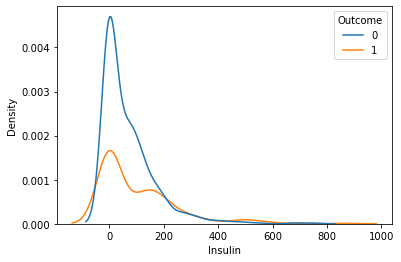

In [5]:

sns.kdeplot(data=df,hue='Outcome',x='Insulin')

In [6]:

train = df[df['Insulin']>0]
train.shape

(394, 9)

In [7]:


test = df[df['Insulin']==0]
test.shape

(374, 9)

In [8]:
label_name = "Insulin"

In [9]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
X_train = train[feature_names]
X_train.shape

(394, 8)

In [11]:
y_train = train[label_name]
y_train.shape

(394,)

In [12]:
X_test = test[feature_names]
X_test.shape

(374, 8)

In [13]:
y_test = test[label_name]
y_test.shape

(374,)

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [15]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [16]:

from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1)

In [17]:
(y_valid_predict == y_train).sum()

3

In [18]:
y_train.shape[0]

394

<AxesSubplot:xlabel='Insulin'>

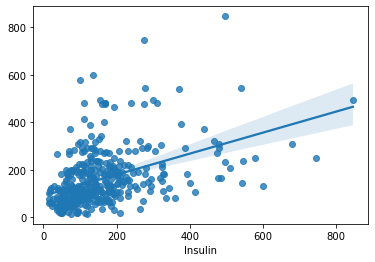

In [19]:
sns.regplot(x=y_train, y=y_valid_predict)

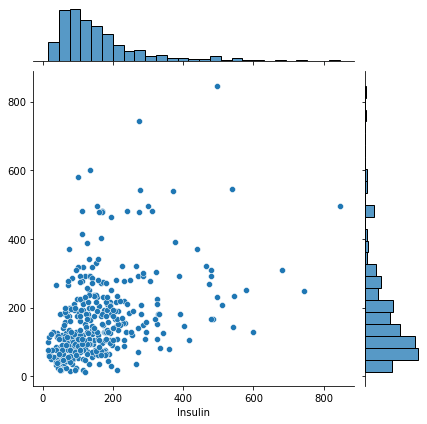

In [20]:
sns.jointplot(x=y_train, y=y_valid_predict)

'\nwhat does 0 means?\ncloser to 0, more accurate with real data and predict\n'

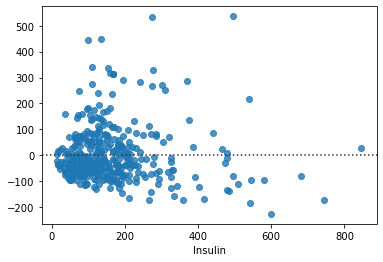

In [21]:
sns.residplot(x=y_train, y=y_valid_predict)

"""
what does 0 means?
closer to 0, more accurate with real data and predict
"""

In [22]:

from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

-0.14429295602725567

In [23]:
df_y = pd.DataFrame({"y_train":y_train, "y_valid_predict":y_valid_predict})

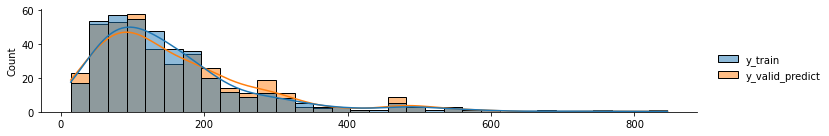

In [24]:
sns.displot(df_y, kde=True, height=2, aspect=5)

In [25]:
error = y_train - y_valid_predict

In [26]:
error.describe()

count    394.000000
mean      -3.941624
std      126.995158
min     -479.000000
25%      -58.750000
50%        2.500000
75%       49.500000
max      495.000000
Name: Insulin, dtype: float64

In [28]:
abs(error).describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

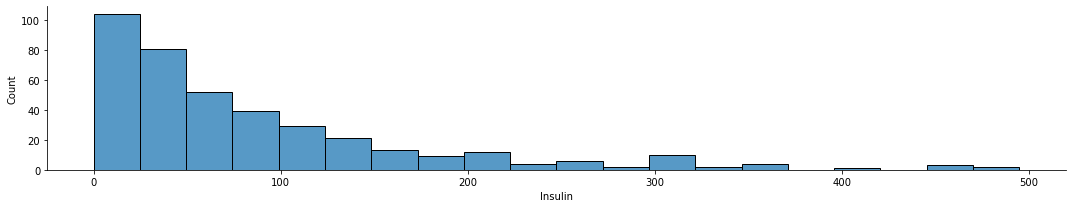

In [30]:
sns.displot(abs(error),height=3, aspect=5)

### MAE(Mean Absolute Error)
* [Mean absolute error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [31]:
error = y_train - y_valid_predict
mae = abs(error).mean()
mae

86.57106598984771

### MAPE(Mean Absolute Percentage Error)

In [32]:
mape = abs(error/y_train).mean()
mape

0.687125648313691

### MSE(Mean Squared Error)

In [35]:
mse = np.square(error).mean()
mse

16102.373096446701

### RMSE(Root Mean Squared Error)

In [37]:
RMSW = np.sqrt(mse)
RMSE

126.89512636995443

In [38]:
model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<AxesSubplot:>

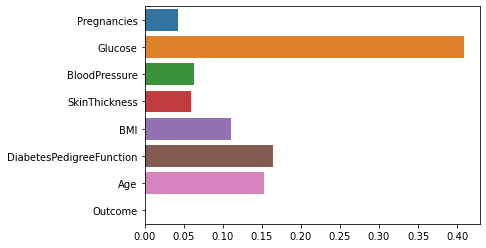

In [39]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [41]:
y_predict = model.predict(X_test)

In [42]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [43]:
test['Insulin'] = y_predict

/var/folders/7v/_59t8s8j3p178243f95xk35r0000gn/T/ipykernel_63035/4025992024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Insulin'] = y_predict


In [44]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0
